<a href="https://colab.research.google.com/github/adhang/learn-data-science/blob/main/Titanic_Spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Spaceship

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Contents**
1. Introduction
2. Importing Libraries
3. Dataset Overview
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Development & Evaluation
7. Conclusion
8. Explainable AI
9. Reference and Further Reading

# 1. Introduction

# 2. Importing Libraries

In [ ]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

!pip install inflection
!pip install dython

In [1]:
# basic
import pandas as pd
import numpy as np

# association between attributes
from dython.nominal import associations

# CamelCase to snake_case format
import inflection

# viz
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)
# change the display precision for better viz
pd.set_option('display.precision', 3)

# 3. Train Dataset Overview

## 3.1. Reading Dataset

In [305]:
path = 'https://raw.githubusercontent.com/adhang/datasets/main/spaceship-titanic-train.csv'

data_train = pd.read_csv(path)
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 3.2. Duplicate Values

In [306]:
data_train.duplicated().sum()

0

This dataset doesn't have any duplicate values. It's a good sign.

## 3.3. Renaming Column Names

Since this dataset is using `CamelCase` format for the column names, I will convert it to `snake_case` format. It's just a personal preference.

In [307]:
# renaming the column
column_list = list(data_train.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

data_train.columns = column_list
data_train.head()

,passenger_id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 3.4. Data Types

In [11]:
data_train.select_dtypes(include=np.number)

,age,room_service,food_court,shopping_mall,spa,vr_deck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [14]:
data_train.select_dtypes(exclude=np.number)

,passenger_id,home_planet,cryo_sleep,cabin,destination,vip,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,False


## 3.5. Missing Values

In [309]:
# total null values
data_null_total = pd.DataFrame(data_train.isna().sum()).T.rename({0:'total null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data_train.isna().sum()/data_train.shape[0]).T.rename({0:'percentage null'})

data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T
data_null.style.background_gradient()

,total null,percentage null
passenger_id,0.000,0.000
home_planet,201.000,2.312
cryo_sleep,217.000,2.496
cabin,199.000,2.289
destination,182.000,2.094
age,179.000,2.059
vip,203.000,2.335
room_service,181.000,2.082
food_court,183.000,2.105
shopping_mall,208.000,2.393


As we can see, there are some null values on the dataset except the `pessenger_id` and `transported`

# 4. Test Dataset Overview

## 4.1. Reading Dataset

In [310]:
path = 'https://raw.githubusercontent.com/adhang/datasets/main/spaceship-titanic-test.csv'

data_test = pd.read_csv(path)
data_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## 4.2. Duplicate Values

In [18]:
data_test.duplicated().sum()

0

This dataset doesn't have any duplicate values. It's a good sign.

## 4.3. Renaming Column Names

Since this dataset is using `CamelCase` format for the column names, I will convert it to `snake_case` format. It's just a personal preference.

In [311]:
# renaming the column
column_list = list(data_test.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

data_test.columns = column_list
data_test.head()

,passenger_id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## 4.4. Data Types

In [20]:
data_test.select_dtypes(include=np.number)

,age,room_service,food_court,shopping_mall,spa,vr_deck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0
4274,NaN,0.0,0.0,0.0,0.0,0.0
4275,NaN,0.0,2680.0,0.0,0.0,523.0


In [21]:
data_test.select_dtypes(exclude=np.number)

,passenger_id,home_planet,cryo_sleep,cabin,destination,vip,name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez
...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,False,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,False,Kitakan Conale


## 4.5. Missing Values

In [312]:
# total null values
data_null_total = pd.DataFrame(data_test.isna().sum()).T.rename({0:'total null'})

# percentage of null values
data_null_percentage = pd.DataFrame(100*data_test.isna().sum()/data_test.shape[0]).T.rename({0:'percentage null'})

data_null = pd.concat([data_null_total, data_null_percentage], axis=0).T
data_null.style.background_gradient()

,total null,percentage null
passenger_id,0.000,0.000
home_planet,87.000,2.034
cryo_sleep,93.000,2.174
cabin,100.000,2.338
destination,92.000,2.151
age,91.000,2.128
vip,93.000,2.174
room_service,82.000,1.917
food_court,106.000,2.478
shopping_mall,98.000,2.291


As we can see, there are some null values on the dataset except the `pessenger_id`

# Data Cleansing

In [315]:
column_numerical = data_train.select_dtypes(include=np.number).columns.values.tolist()
column_numerical

['age', 'room_service', 'food_court', 'shopping_mall', 'spa', 'vr_deck']

In [316]:
column_categorical = data_train.select_dtypes(exclude=np.number).columns.values.tolist()
column_categorical

['passenger_id',
 'home_planet',
 'cryo_sleep',
 'cabin',
 'destination',
 'vip',
 'name',
 'transported']

## Feature Extraction

In [317]:
data_train[column_categorical].nunique()

passenger_id    8693
home_planet        3
cryo_sleep         2
cabin           6560
destination        3
vip                2
name            8473
transported        2
dtype: int64

We can see that the `passenger id`, `cabin`, and `name` columns have many unique values. Let's see if these features have a pattern or not.

In [318]:
data_train.loc[:10, ['passenger_id', 'cabin', 'name']]

,passenger_id,cabin,name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines
5,0005_01,F/0/P,Sandie Hinetthews
6,0006_01,F/2/S,Billex Jacostaffey
7,0006_02,G/0/S,Candra Jacostaffey
8,0007_01,F/3/S,Andona Beston
9,0008_01,B/1/P,Erraiam Flatic


Look at the index numbers 2 & 3, they have the same cabin and the same surname. It also happens to index numbers 9 & 10. Maybe, they are family?
<br><br>
Interestingly, this `passenger_id` has a pattern.
<br><br>
It might be like this: `xxxx_yy`, where `x` is the 'group' and `y` is the 'passenger ID in that group'
<br><br>
We can use this information to fill the null values on the `cabin` column.

### Passenger ID

#### Train

In [319]:
data_id_train = data_train['passenger_id'].str.split('_', expand=True)
data_id_train = data_id_train.rename(columns={0:'passenger_group', 1:'passenger_num'})

data_id_train

,passenger_group,passenger_num
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01
...,...,...
8688,9276,01
8689,9278,01
8690,9279,01
8691,9280,01


#### Test

In [320]:
data_id_test = data_test['passenger_id'].str.split('_', expand=True)
data_id_test = data_id_test.rename(columns={0:'passenger_group', 1:'passenger_num'})

data_id_test

,passenger_group,passenger_num
0,0013,01
1,0018,01
2,0019,01
3,0021,01
4,0023,01
...,...,...
4272,9266,02
4273,9269,01
4274,9271,01
4275,9273,01


### Cabin
I'm extracting this feature because I want to know, if the cabin deck or cabin side have a relationship with the `transported` status or not.

#### Train

In [321]:
data_cabin_train = data_train['cabin'].str.split('/', expand=True)
data_cabin_train = data_cabin_train.rename(columns={0:'cabin_deck', 1:'cabin_num', 2:'cabin_side'})

data_cabin_train

,cabin_deck,cabin_num,cabin_side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [322]:
data_cabin_train.dtypes

cabin_deck    object
cabin_num     object
cabin_side    object
dtype: object

We need to change the `cabin_num` to numeric so we can do some calculation such as calculating the mean or median

In [323]:
data_cabin_train['cabin_num'] = pd.to_numeric(data_cabin_train['cabin_num'], errors='coerce')

data_cabin_train.dtypes

cabin_deck     object
cabin_num     float64
cabin_side     object
dtype: object

In [324]:
data_cabin_train.groupby('cabin_deck').mean().astype(int)

,cabin_num
cabin_deck,
A,51
B,164
C,166
D,142
E,299
F,924
G,749
T,1


In [325]:
data_cabin_train.groupby('cabin_deck').mean().astype(int).loc['A', 'cabin_num']

51

#### Test

In [326]:
data_cabin_test = data_test['cabin'].str.split('/', expand=True)
data_cabin_test = data_cabin_test.rename(columns={0:'cabin_deck', 1:'cabin_num', 2:'cabin_side'})

data_cabin_test

,cabin_deck,cabin_num,cabin_side
0,G,3,S
1,F,4,S
2,C,0,S
3,C,1,S
4,F,5,S
...,...,...,...
4272,G,1496,S
4273,NaN,NaN,NaN
4274,D,296,P
4275,D,297,P


In [327]:
data_cabin_test['cabin_num'] = pd.to_numeric(data_cabin_test['cabin_num'], errors='coerce')

### Combine to All Features

#### Train

In [328]:
data_train_update = pd.concat([data_train, data_id_train, data_cabin_train], axis=1)

data_train_update.head()

,passenger_id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,transported,passenger_group,passenger_num,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1.0,S


#### Test

In [329]:
data_test_update = pd.concat([data_test, data_id_test, data_cabin_test], axis=1)

data_test_update.head()

,passenger_id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,passenger_group,passenger_num,cabin_deck,cabin_num,cabin_side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,01,G,3.0,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,01,F,4.0,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,01,C,0.0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,01,C,1.0,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,01,F,5.0,S


## Simple Imputation

In [330]:
for col in ['home_planet', 'cryo_sleep', 'destination', 'vip']:
  # slicing to index [0] because it may have some mode
  train_mode = data_train_update[col].mode()[0]
  data_train_update[col].fillna(train_mode, inplace=True)

  # fill the test set with the mode of the train set
  data_test_update[col].fillna(train_mode, inplace=True)

for col in column_numerical:
  train_median = data_train_update[col].median()

  data_train_update[col].fillna(train_median, inplace=True)

  # fill the test set with the median of the train set
  data_test_update[col].fillna(train_median, inplace=True)

In [331]:
data_train_update['name'].fillna('Unknown', inplace=True)
data_test_update['name'].fillna('Unknown', inplace=True)

In [332]:
data_train_update.isna().sum()

passenger_id         0
home_planet          0
cryo_sleep           0
cabin              199
destination          0
age                  0
vip                  0
room_service         0
food_court           0
shopping_mall        0
spa                  0
vr_deck              0
name                 0
transported          0
passenger_group      0
passenger_num        0
cabin_deck         199
cabin_num          199
cabin_side         199
dtype: int64

In [334]:
data_test_update.isna().sum()

passenger_id         0
home_planet          0
cryo_sleep           0
cabin              100
destination          0
age                  0
vip                  0
room_service         0
food_court           0
shopping_mall        0
spa                  0
vr_deck              0
name                 0
passenger_group      0
passenger_num        0
cabin_deck         100
cabin_num          100
cabin_side         100
dtype: int64

## Complex Imputation

We know that passenger with the same group will have the same cabin. Therefore, I will impute missing values on the `cabin` column based on the `passenger_group`.

### Train

In [335]:
data_train_update['cabin'].isna().sum()

199

In [336]:
tmp = data_train_update.groupby('passenger_group')

data_train_update['cabin'] = tmp['cabin'].transform(lambda s: np.nan if pd.isnull(s).all() == True
                         else s.loc[s.first_valid_index()])

Let's see if it has solve our problem

In [337]:
data_train_update['cabin'].isna().sum()

99

It still have some missing values. My next approach is:
- fill with the mode of `cabin_deck`
- fill with the median of `cabin_num` for the specific cabin deck
- fill with the mode of `cabin_side` for the specific cabin deck
<br><br>

But, I will re-assign the `cabin_deck`, `cabin_num`, and `cabin_side` with new values, since we have already fill some missing values on the `cabin` column.

In [338]:
data_cabin_train = data_train_update['cabin'].str.split('/', expand=True)
data_cabin_train = data_cabin_train.rename(columns={0:'cabin_deck', 1:'cabin_num', 2:'cabin_side'})

data_cabin_train['cabin_num'] = pd.to_numeric(data_cabin_train['cabin_num'], errors='coerce')

data_train_update['cabin_deck'] = data_cabin_train['cabin_deck'].copy()
data_train_update['cabin_num'] = data_cabin_train['cabin_num'].copy()
data_train_update['cabin_side'] = data_cabin_train['cabin_side'].copy()

In [339]:
cabin_deck_mode = data_train_update['cabin_deck'].mode()[0]

cabin_num_median = data_train_update.loc[:, ['cabin_deck','cabin_num']].groupby('cabin_deck').median().astype(int)
cabin_num_median = cabin_num_median.loc[cabin_deck_mode][0]

cabin_side_mode = data_train_update.loc[:, ['cabin_deck','cabin_side']].groupby('cabin_deck').agg(pd.Series.mode)
cabin_side_mode = cabin_side_mode.loc[cabin_deck_mode][0]

data_train_update['cabin'] = data_train_update['cabin'].fillna(f'{cabin_deck_mode}/{cabin_num_median}/{cabin_side_mode}')

Let's see if it has solve our problem

In [340]:
data_train_update['cabin'].isna().sum()

0

Yay, the `cabin` column has no missing values anymore. Now, I will update the extracted columns

In [341]:
data_cabin_train = data_train_update['cabin'].str.split('/', expand=True)
data_cabin_train = data_cabin_train.rename(columns={0:'cabin_deck', 1:'cabin_num', 2:'cabin_side'})

data_cabin_train['cabin_num'] = pd.to_numeric(data_cabin_train['cabin_num'], errors='coerce')

data_train_update['cabin_deck'] = data_cabin_train['cabin_deck'].copy()
data_train_update['cabin_num'] = data_cabin_train['cabin_num'].copy()
data_train_update['cabin_side'] = data_cabin_train['cabin_side'].copy()

### Test

In [342]:
data_test_update['cabin'].isna().sum()

100

First, I will look for the matching value on the train set

In [343]:
tmp = data_train_update.groupby('passenger_group')

data_test_update['cabin'] = tmp['cabin'].transform(lambda s: np.nan if pd.isnull(s).all() == True
                         else s.loc[s.first_valid_index()])

Let's see if it has solve our problem

In [344]:
data_test_update['cabin'].isna().sum()

0

In [345]:
data_cabin_test = data_test_update['cabin'].str.split('/', expand=True)
data_cabin_test = data_cabin_test.rename(columns={0:'cabin_deck', 1:'cabin_num', 2:'cabin_side'})

data_cabin_test['cabin_num'] = pd.to_numeric(data_cabin_test['cabin_num'], errors='coerce')

data_test_update['cabin_deck'] = data_cabin_test['cabin_deck'].copy()
data_test_update['cabin_num'] = data_cabin_test['cabin_num'].copy()
data_test_update['cabin_side'] = data_cabin_test['cabin_side'].copy()

In [346]:
data_test_update.isna().sum()

passenger_id       0
home_planet        0
cryo_sleep         0
cabin              0
destination        0
age                0
vip                0
room_service       0
food_court         0
shopping_mall      0
spa                0
vr_deck            0
name               0
passenger_group    0
passenger_num      0
cabin_deck         0
cabin_num          0
cabin_side         0
dtype: int64

# Exploratory Data Analysis

In [351]:
column_numerical = data_train_update.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = data_train_update.select_dtypes(exclude=np.number).columns.values.tolist()

# np.delete(column_categorical, 'transported')
column_categorical.remove('transported')

In [352]:
data_viz = data_train_update.copy()
data_viz.loc[:,'transported'] = data_viz.loc[:, 'transported'].apply(lambda x: 'transported' if x is True else 'not transported')

In [353]:
data_viz.head()

,passenger_id,home_planet,cryo_sleep,cabin,destination,age,vip,room_service,food_court,shopping_mall,spa,vr_deck,name,transported,passenger_group,passenger_num,cabin_deck,cabin_num,cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,not transported,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,transported,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,not transported,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,not transported,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,transported,0004,01,F,1,S


## Visualization Function

In [366]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['transported', 'not transported'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('not transported', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('not transported', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Passenger Transported Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

## Target Distribution

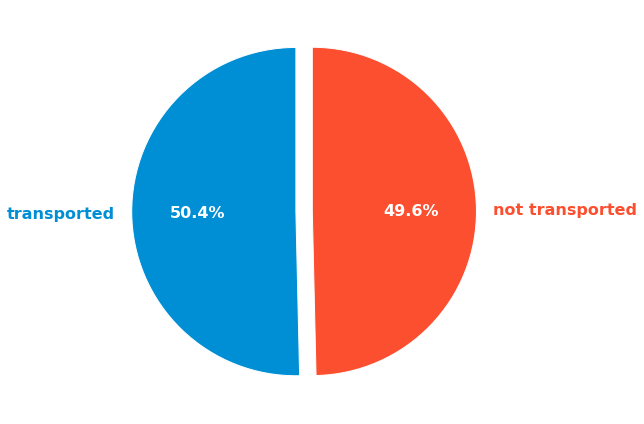

In [355]:
pie_data = data_viz['transported'].value_counts(normalize=True).values * 100
pie_label = data_viz['transported'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.1f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()

It's a balanced dataset, so I don't have to do dataset balancing

## Categorical Distribution

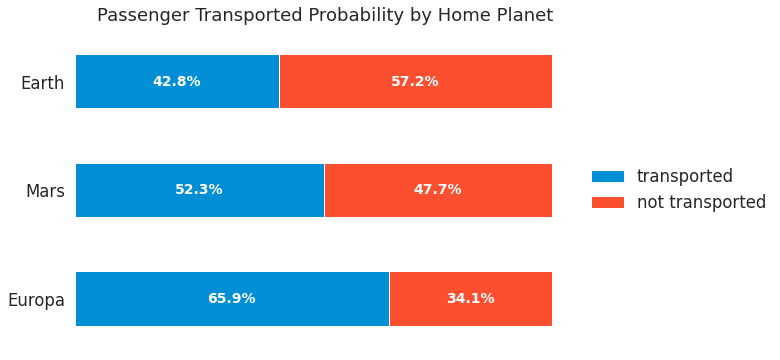

In [367]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='home_planet', y='transported', ax=ax, show=False)

plt.show()

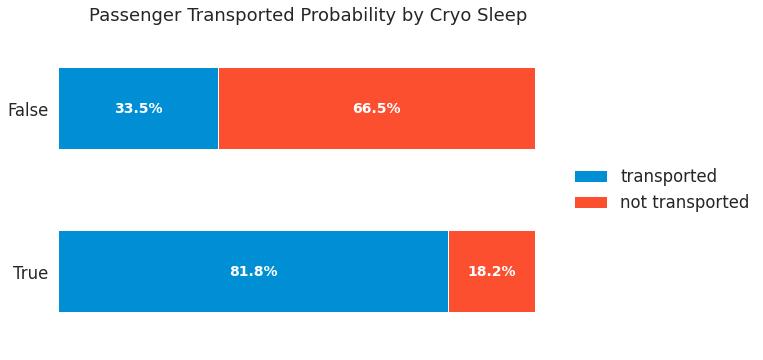

In [368]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='cryo_sleep', y='transported', ax=ax, show=False)

plt.show()

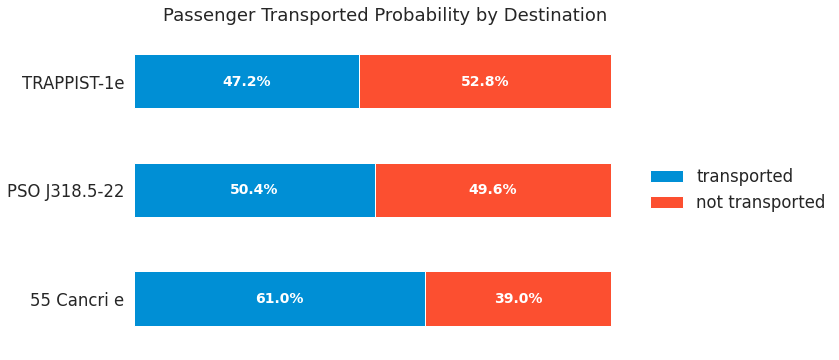

In [369]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='destination', y='transported', ax=ax, show=False)

plt.show()

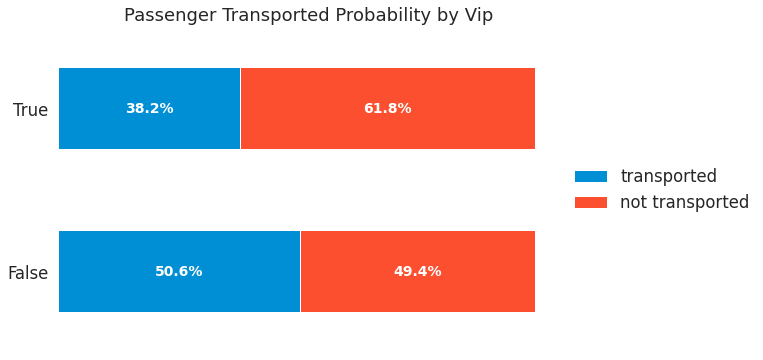

In [370]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='vip', y='transported', ax=ax, show=False)

plt.show()

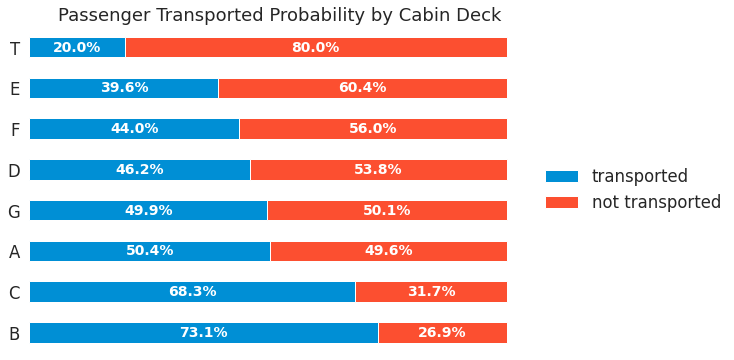

In [371]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='cabin_deck', y='transported', ax=ax, show=False)

plt.show()

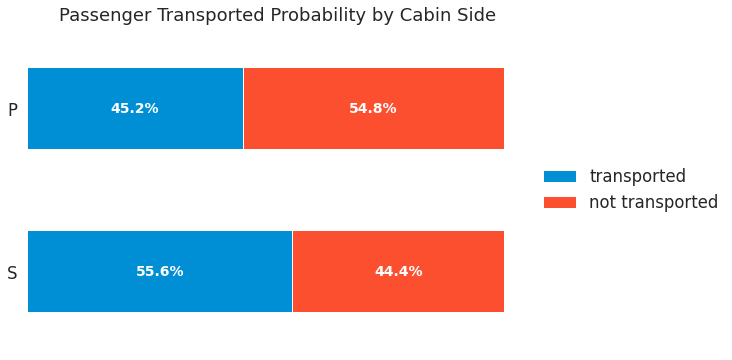

In [373]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='cabin_side', y='transported', ax=ax, show=False)

plt.show()

## Numerical Distribution

In [374]:
column_numerical

['age',
 'room_service',
 'food_court',
 'shopping_mall',
 'spa',
 'vr_deck',
 'cabin_num']